<a href="https://colab.research.google.com/github/Nanoth-T/Senior-Project/blob/main/Data/midi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load packages

In [1]:
!pip install mingus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 1.4 MB/s eta 0:00:00


In [2]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54568 sha256=861fc36cf9a1bb3e75bf4f544afcb1b2fbb20c15fd0a9db5219f72a3f7e1c7af
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [3]:
!pip install midi2audio
!pip install fluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4487 sha256=b75a2f637cf3be849924a65033d72656e5095c926e3bf025de43ec9ea5ab94fa
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth


In [4]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [5]:
import scipy as sp

In [6]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [7]:
import fluidsynth
from midi2audio import FluidSynth

In [8]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [9]:
fs = FluidSynth()

In [10]:
from mingus.core import chords

result = chords.from_shorthand("Cmaj7")

print(result)

['C', 'E', 'G', 'B']


In [11]:
import random

In [12]:
from midiutil import MIDIFile
from mingus.core import chords

In [13]:
import numpy as np
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ver1

In [ ]:
chord_progression = ["C#m7", "G7", "Gmaj7"]  #modify this to random note

def create_track(n):
  NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
  OCTAVES = list(range(11))
  NOTES_IN_OCTAVE = len(NOTES)

  errors = {
      'notes': 'Bad input, please refer this spec-\n'
  }


  def swap_accidentals(note):
      if note == 'Db':
          return 'C#'
      if note == 'D#':
          return 'Eb'
      if note == 'E#':
          return 'F'
      if note == 'Gb':
          return 'F#'
      if note == 'G#':
          return 'Ab'
      if note == 'A#':
          return 'Bb'
      if note == 'B#':
          return 'C'

      return note


  def note_to_number(note: str, octave: int) -> int:
      note = swap_accidentals(note)
      assert note in NOTES, errors['notes']
      assert octave in OCTAVES, errors['notes']

      note = NOTES.index(note)
      note += (NOTES_IN_OCTAVE * octave)

      assert 0 <= note <= 127, errors['notes']

      return note

  array_of_notes = []
  for i in range(10):
      idx = random.randint(1, 11)
      array_of_notes.append(NOTES[idx])
  # for chord in chord_progression:
  #     array_of_notes.extend(chords.from_shorthand(chord))

  array_of_note_numbers = []
  for note in array_of_notes:
      # OCTAVE = 4
      OCTAVE = random.randint(1, 8)
      # print(OCTAVE)
      array_of_note_numbers.append(note_to_number(note, OCTAVE))

  track = 0
  channel = 0
  time = 0
  duration = 1  # In beats
  tempo = random.randint(50, 180)  # In BPM #slow2fast
  volume = 100  # 0-127, as per the MIDI standard
  MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
  # automatically)
  MyMIDI.addTempo(track, time, tempo)

  for i, pitch in enumerate(array_of_note_numbers):
      MyMIDI.addNote(track, channel, pitch, time + i, duration, volume) #modify time incress to make overlapped note

  with open(f"sound{n}.mid", "wb") as output_file:
      MyMIDI.writeFile(output_file)

  return tempo

In [ ]:
track = 10
labels = []
for i in range(track):
  label = create_track(i)
  labels.append(label)

In [ ]:
for i in range(track):
  fs.midi_to_audio(f'/content/sound{i}.mid', f'sound{i}.wav')

In [ ]:
labels

[71, 165, 133, 77, 57, 142, 67, 106, 127, 113]

In [ ]:
song, sr = librosa.load('/content/sound3.wav')
song

array([-2.2364780e-05, -2.5476329e-05, -2.1252781e-05, ...,
       -4.4906610e-03, -4.2358018e-03, -4.8025455e-03], dtype=float32)

In [ ]:
ipd.Audio('/content/sound4.wav')

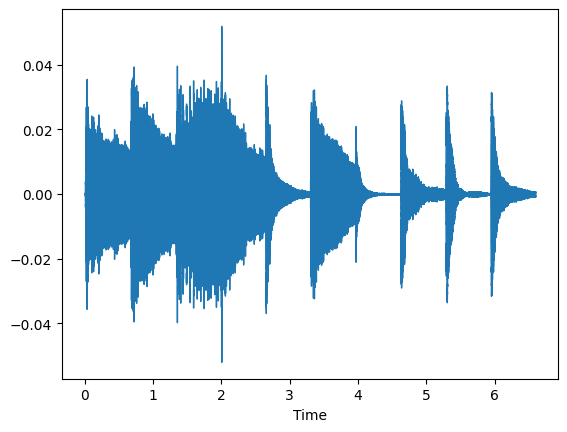

In [ ]:
librosa.display.waveshow(song)

In [ ]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

<ipython-input-30-88976bb66d20>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


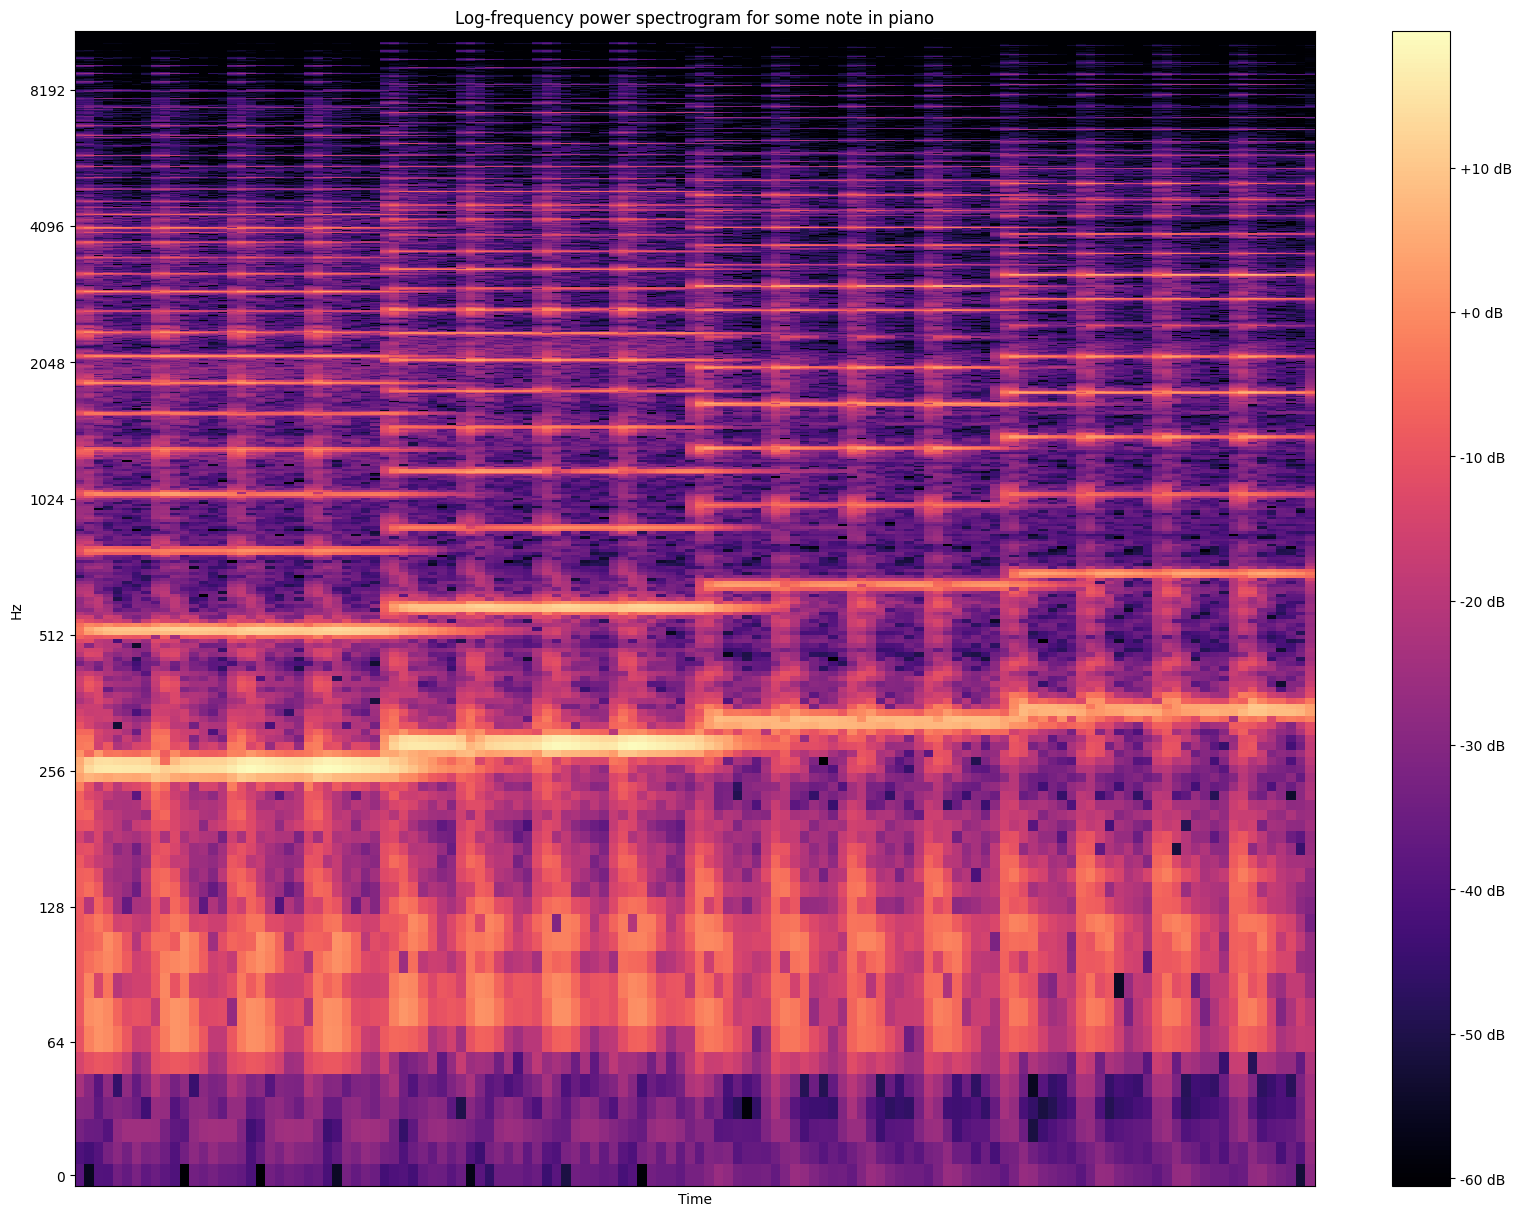

In [ ]:
plot_spectrogram(song, "some note in piano")

# ver2

In [ ]:
from midiutil.MidiFile import MIDIFile

# Create a MIDIFile object with one track
midi = MIDIFile(1)

# Add track name and tempo
track = 0
time = 0
midi.addTrackName(track, time, "Sample Track")
midi.addTempo(track, time, 120)  # Tempo in BPM (beats per minute)

# Add some notes (pitch, duration, volume)
channel = 0
volume = 100

# Define durations for each note/rest in the specified rhythm
durations = [1, 1, 1, 1] *4  # Durations in beats (1 = whole, 0.5 = half, etc.)
pitchs = [-1, 60,  -1, 60] *4
# Adding notes (or rests)
start_time = 1
for i in range(len(durations)):
    duration = durations[i]
    pitch = pitchs[i]
    if pitch != -1:
      midi.addNote(track, channel, pitch, start_time, duration, volume)
    start_time += duration  # Move to the next note/rest

# Save the MIDI file
with open("output_custom_rhythm.mid", "wb") as file:
    midi.writeFile(file)


In [ ]:
fs.midi_to_audio(f'output_custom_rhythm.mid', f'output_custom_rhythm.wav')
song, sr = librosa.load('/content/output_custom_rhythm.wav')
ipd.Audio('/content/output_custom_rhythm.wav')

# ver3 - very simple version

In [15]:
def create_track(bars, tempos, rhythms):
  cnt = 1
  for tp in range(len(tempos)):
    for rt in range(len(rhythms)):
      # Create a MIDIFile object with one track
      midi = MIDIFile(1)

      track = 0
      channel = 0
      start_time = 0
      volume = 100  # 0-127, as per the MIDI standard

      tempo = get_tempo(tempos[tp])  # In BPM #slow2fast
      midi.addTempo(track, start_time, tempo)

      durations, num_of_1bar = get_duration(rhythms[rt], bars)  # In beats

      pitchs = create_note(num_of_1bar, bars)

      for i in range(len(durations)):
          duration = durations[i]
          pitch = pitchs[i]
          if pitch != -1:
            midi.addNote(track, channel, pitch, start_time, duration, volume)
          start_time += duration  # Move to the next note/rest

      with open(f"sound{cnt}.mid", "wb") as output_file:
          midi.writeFile(output_file)

      cnt += 1

In [16]:
# time signature is 4/4 : 1 bar

def get_tempo(tempo):
    if tempo == "slow":
      tempo = random.randint(40, 80)
    elif tempo == "moderate":
      tempo = random.randint(81, 120)
    elif tempo == "fast":
      tempo = random.randint(121, 170)
    return tempo

def get_duration(rhythm, bars):
    if rhythm == "whole":
      duration = [4]
    elif rhythm == "half":
      duration = [2, 2]
    elif rhythm == "quarter":
      duration = [1, 1, 1, 1]
    elif rhythm == "8th":
      duration = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
    elif rhythm == "16th":
      duration = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
    return duration * bars, len(duration)

In [27]:
def create_note(num_of_1bar, bars):
    unique = bars

    NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
    OCTAVES = list(range(11))
    NOTES_IN_OCTAVE = len(NOTES)

    def swap_accidentals(note):
        if note == 'Db':
            return 'C#'
        if note == 'D#':
            return 'Eb'
        if note == 'E#':
            return 'F'
        if note == 'Gb':
            return 'F#'
        if note == 'G#':
            return 'Ab'
        if note == 'A#':
            return 'Bb'
        if note == 'B#':
            return 'C'

        return note

    def note_to_number(note: str, octave: int) -> int:
        note = swap_accidentals(note)

        note = NOTES.index(note)
        note += (NOTES_IN_OCTAVE * octave)

        return note


    array_of_notes = []
    for i in range(unique):
        idx = 0
        # idx = random.randint(1, 11)
        for j in range(num_of_1bar):
            array_of_notes.append(NOTES[idx])
    # for chord in chord_progression:
    # array_of_notes.extend(chords.from_shorthand(chord))

    array_of_note_numbers = []
    for note in array_of_notes:
        OCTAVE = 4
        # OCTAVE = random.randint(1, 8)
        # print(OCTAVE)
        array_of_note_numbers.append(note_to_number(note, OCTAVE))

    return array_of_note_numbers

In [28]:
bars = 4
tempo_label = ["slow", "moderate", "fast"]
rhythm_label = ["whole", "half", "quarter", "8th", "16th"]
n = len(tempo_label) * len(rhythm_label)

create_track(bars, tempo_label, rhythm_label)

In [29]:
target_tempo = [tempo_label[i // len(rhythm_label)] for i in range(len(tempo_label) * len(rhythm_label))]
target_rhythm = [label for label in rhythm_label *(len(tempo_label))]

print(target_tempo)
print(target_rhythm)

['slow', 'slow', 'slow', 'slow', 'slow', 'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'fast', 'fast', 'fast', 'fast', 'fast']
['whole', 'half', 'quarter', '8th', '16th', 'whole', 'half', 'quarter', '8th', '16th', 'whole', 'half', 'quarter', '8th', '16th']


In [30]:
for i in range(n):
    fs.midi_to_audio(f'sound{i+1}.mid', f'/content/drive/MyDrive/!Project/Toy Dataset/sound{i+1}.wav')
    # song, sr = librosa.load(f'/content/sound{i+1}.wav')
    # ipd.display(ipd.Audio(f'/content/sound{i+1}.wav'))

In [31]:
title = [f'sound{i}.wav' for i in range(1, n+1)]
target_tempo = [tempo_label[i // len(rhythm_label)] for i in range(len(tempo_label) * len(rhythm_label))]
target_rhythm = [label for label in rhythm_label *(len(tempo_label))]

In [32]:
dic = {'name':title, 'tempo':target_tempo, 'rhythm':target_rhythm}
df = pd.DataFrame(dic)
df

name     tempo   rhythm
0    sound1.wav      slow    whole
1    sound2.wav      slow     half
2    sound3.wav      slow  quarter
3    sound4.wav      slow      8th
4    sound5.wav      slow     16th
5    sound6.wav  moderate    whole
6    sound7.wav  moderate     half
7    sound8.wav  moderate  quarter
8    sound9.wav  moderate      8th
9   sound10.wav  moderate     16th
10  sound11.wav      fast    whole
11  sound12.wav      fast     half
12  sound13.wav      fast  quarter
13  sound14.wav      fast      8th
14  sound15.wav      fast     16th

In [33]:
df.to_csv('/content/drive/MyDrive/!Project/Toy Dataset/metadata.csv')

# ver4 - ถ้ามี